## Part 1:Data preparation and cleaning of data set 

In [1]:
# Basic Libraries
from sklearn.datasets import load_boston 
import pandas as pd 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
%matplotlib inline 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import RFE 
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso




## importing the data we need 

In [2]:
data = pd.read_csv('nba_team_stats_playoffs_00_to_21.csv') ##used to filter out the playoff teams
data.head()

,teamstatspk,team,games_played,wins,losses,win_percentage,minutes,points,field_goals_made,field_goals_attempted,...,rebounds,assists,turnovers,steals,blocks,blocks_attempted,personal_fouls,personal_fouls_drawn,plus_minus,season
0,0,Milwaukee Bucks,23,16,7,0.696,48.4,110.3,42.1,91.1,...,49.0,22.8,12.7,7.8,4.2,3.8,18.0,20.1,5.1,2020-21
1,1,Phoenix Suns,22,14,8,0.636,48.0,109.0,40.9,85.0,...,42.7,23.2,11.9,6.5,4.2,3.6,19.7,18.5,4.5,2020-21
2,2,Brooklyn Nets,12,7,5,0.583,48.4,112.5,40.7,86.2,...,42.6,22.6,11.6,7.1,4.8,6.2,21.2,18.6,6.3,2020-21
3,3,Philadelphia 76ers,12,7,5,0.583,48.0,116.3,42.5,85.8,...,44.7,24.9,12.8,8.0,6.2,3.8,23.0,23.8,7.5,2020-21
4,4,Atlanta Hawks,18,10,8,0.556,48.0,106.3,38.9,86.8,...,42.4,20.2,12.4,6.7,4.4,4.3,21.2,20.3,-1.5,2020-21


In [3]:
stats = pd.read_csv('nba_reg_stats.csv') 
stats.head()

,teamstatspk,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON,CHAMPION
0,0,Phoenix Suns,72,51,21,0.708,48.1,115.3,43.3,88.3,...,26.9,12.5,7.2,4.3,3.6,19.1,18.0,5.8,2020-21,False
1,1,Golden State Warriors,72,39,33,0.542,48.2,113.7,41.3,88.2,...,27.7,15.0,8.2,4.8,4.3,21.2,19.5,1.1,2020-21,False
2,2,Memphis Grizzlies,72,38,34,0.528,48.3,113.3,42.8,91.8,...,26.9,13.3,9.1,5.1,5.2,18.7,18.3,1.0,2020-21,False
3,3,Miami Heat,72,40,32,0.556,48.5,108.1,39.2,83.7,...,26.3,14.1,7.9,4.0,4.0,18.9,19.6,0.0,2020-21,False
4,4,Chicago Bulls,72,31,41,0.431,48.1,110.7,42.2,88.6,...,26.8,15.1,6.7,4.2,5.1,18.9,17.7,-0.9,2020-21,False


In [4]:
adv_stats = pd.read_excel('Advanced stats.xlsx')
adv_stats.head()

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,TS%,eFG%,TOV%,ORB%,FT/FGA,DeFG%,OTOV%,DRB%,OFT/FGA,Season
0,1,Phoenix Suns,26.6,51,21,49,23,5.82,-0.15,5.67,...,0.597,0.564,11.5,20.8,0.177,0.534,12.4,78.5,0.194,2020-21
1,2,Memphis Grizzlies,24.2,38,34,38,34,1.03,0.04,1.07,...,0.560,0.528,11.6,24.2,0.179,0.535,13.1,78.3,0.196,2020-21
2,3,Miami Heat,27.4,40,32,36,36,0.03,-0.09,-0.06,...,0.581,0.546,13.1,19.4,0.199,0.542,13.8,77.9,0.183,2020-21
3,4,Milwaukee Bucks,28.1,46,26,48,24,5.89,-0.32,5.57,...,0.593,0.566,12.0,23.3,0.177,0.536,11.5,79.7,0.157,2020-21
4,5,Philadelphia 76ers,27.1,49,23,48,24,5.58,-0.31,5.28,...,0.579,0.541,12.8,23.2,0.225,0.521,13.8,78.2,0.200,2020-21



## this data shows just which teams have made the playoffs from 2000 to 2021 

In [5]:


data.drop(["teamstatspk", "games_played","wins","losses","win_percentage","minutes","points","field_goals_made","field_goals_attempted","field_goal_percentage","three_pointers_made","three_pointers_attempted","three_point_percentage","free_throws_made","free_throw_attempted","free_throw_percentage","offensive_rebounds","defensive_rebounds","rebounds","assists","turnovers","steals","blocks","blocks_attempted","personal_fouls","personal_fouls_drawn","plus_minus"], axis = 1, inplace = True)
data.head(335)

,team,season
0,Milwaukee Bucks,2020-21
1,Phoenix Suns,2020-21
2,Brooklyn Nets,2020-21
3,Philadelphia 76ers,2020-21
4,Atlanta Hawks,2020-21
...,...,...
330,Indiana Pacers,2000-01
331,Minnesota Timberwolves,2000-01
332,Orlando Magic,2000-01
333,Phoenix Suns,2000-01


## We will now reduce the scope of our research to a 10 year span 

In [6]:
data["team_season"] = data["team"] + data["season"]
data.head()

,team,season,team_season
0,Milwaukee Bucks,2020-21,Milwaukee Bucks2020-21
1,Phoenix Suns,2020-21,Phoenix Suns2020-21
2,Brooklyn Nets,2020-21,Brooklyn Nets2020-21
3,Philadelphia 76ers,2020-21,Philadelphia 76ers2020-21
4,Atlanta Hawks,2020-21,Atlanta Hawks2020-21


In [7]:


data = data[data["season"].str.contains("2011-12|2012-13|2013-14|2014-15|2015-16|2016-17|2017-18|2018-19|2019-20|2020-21") == True]
print("shape: ",data.shape)

shape:  (160, 3)


## We add a new column called team_season which we can use later to extract the playoff teams from the 2 datasets we are going to use 

In [8]:
data["team_season"] = data["team"] + data["season"]
data.head()

,team,season,team_season
0,Milwaukee Bucks,2020-21,Milwaukee Bucks2020-21
1,Phoenix Suns,2020-21,Phoenix Suns2020-21
2,Brooklyn Nets,2020-21,Brooklyn Nets2020-21
3,Philadelphia 76ers,2020-21,Philadelphia 76ers2020-21
4,Atlanta Hawks,2020-21,Atlanta Hawks2020-21


## We now reduce the scope of the regular season stats to 10 years and add the team_season column (the dataset we are going to use for EDA and machine learning) 

In [9]:
stats = stats[stats["SEASON"].str.contains("2011-12|2012-13|2013-14|2014-15|2015-16|2016-17|2017-18|2018-19|2019-20|2020-21") == True]
print("shape: ",stats.shape)
stats["team_season"] = stats["TEAM"] + stats["SEASON"]
stats.head(300)


shape:  (300, 30)


,teamstatspk,TEAM,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,TOV,STL,BLK,BLKA,PF,PFD,+/-,SEASON,CHAMPION,team_season
0,0,Phoenix Suns,72,51,21,0.708,48.1,115.3,43.3,88.3,...,12.5,7.2,4.3,3.6,19.1,18.0,5.8,2020-21,False,Phoenix Suns2020-21
1,1,Golden State Warriors,72,39,33,0.542,48.2,113.7,41.3,88.2,...,15.0,8.2,4.8,4.3,21.2,19.5,1.1,2020-21,False,Golden State Warriors2020-21
2,2,Memphis Grizzlies,72,38,34,0.528,48.3,113.3,42.8,91.8,...,13.3,9.1,5.1,5.2,18.7,18.3,1.0,2020-21,False,Memphis Grizzlies2020-21
3,3,Miami Heat,72,40,32,0.556,48.5,108.1,39.2,83.7,...,14.1,7.9,4.0,4.0,18.9,19.6,0.0,2020-21,False,Miami Heat2020-21
4,4,Chicago Bulls,72,31,41,0.431,48.1,110.7,42.2,88.6,...,15.1,6.7,4.2,5.1,18.9,17.7,-0.9,2020-21,False,Chicago Bulls2020-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,295,Sacramento Kings,66,22,44,0.333,48.2,98.8,37.7,86.5,...,14.4,8.5,4.9,6.4,19.5,19.9,-5.7,2011-12,False,Sacramento Kings2011-12
296,296,Cleveland Cavaliers,66,21,45,0.318,48.4,93.0,34.3,81.2,...,15.4,7.1,4.0,6.2,20.0,20.9,-7.2,2011-12,False,Cleveland Cavaliers2011-12
297,297,New Orleans Hornets,66,21,45,0.318,48.3,89.6,34.8,77.3,...,15.5,7.4,4.8,5.8,20.1,18.7,-3.8,2011-12,False,New Orleans Hornets2011-12
298,298,Washington Wizards,66,20,46,0.303,48.1,93.6,36.6,83.0,...,15.3,8.0,6.3,4.5,21.3,18.7,-4.8,2011-12,False,Washington Wizards2011-12


## We will now shave off the teams that failed to make the playoffs,there should be 16 teams x10 seasons = 160 playoff teams 

In [10]:
col_list = data.team_season.values.tolist()
print(col_list)
count = 0
for i in col_list:
    count = count + 1
stats = stats[stats['team_season'].isin(col_list)]
stats.head()
stats.shape

['Milwaukee Bucks2020-21', 'Phoenix Suns2020-21', 'Brooklyn Nets2020-21', 'Philadelphia 76ers2020-21', 'Atlanta Hawks2020-21', 'Utah Jazz2020-21', 'LA Clippers2020-21', 'Dallas Mavericks2020-21', 'Denver Nuggets2020-21', 'Los Angeles Lakers2020-21', 'Portland Trail Blazers2020-21', 'Boston Celtics2020-21', 'Memphis Grizzlies2020-21', 'New York Knicks2020-21', 'Washington Wizards2020-21', 'Miami Heat2020-21', 'Los Angeles Lakers2019-20', 'Miami Heat2019-20', 'Toronto Raptors2019-20', 'Boston Celtics2019-20', 'LA Clippers2019-20', 'Milwaukee Bucks2019-20', 'Denver Nuggets2019-20', 'Oklahoma City Thunder2019-20', 'Utah Jazz2019-20', 'Houston Rockets2019-20', 'Dallas Mavericks2019-20', 'Orlando Magic2019-20', 'Portland Trail Blazers2019-20', 'Brooklyn Nets2019-20', 'Indiana Pacers2019-20', 'Philadelphia 76ers2019-20', 'Milwaukee Bucks2018-19', 'Toronto Raptors2018-19', 'Golden State Warriors2018-19', 'Philadelphia 76ers2018-19', 'Boston Celtics2018-19', 'Houston Rockets2018-19', 'Denver Nu

(160, 31)

## Now we will focus on combining the advanced stats with the regular season stats, this final combination of datasets will be the final data set we will be using for our machine learning

In [11]:
adv_stats["team_season"] = adv_stats["Team"] + adv_stats["Season"]

In [12]:
adv_stats = adv_stats[adv_stats['team_season'].isin(col_list)]
adv_stats.shape

(160, 27)

In [13]:

adv_stats.head()

,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,eFG%,TOV%,ORB%,FT/FGA,DeFG%,OTOV%,DRB%,OFT/FGA,Season,team_season
0,1,Phoenix Suns,26.6,51,21,49,23,5.82,-0.15,5.67,...,0.564,11.5,20.8,0.177,0.534,12.4,78.5,0.194,2020-21,Phoenix Suns2020-21
1,2,Memphis Grizzlies,24.2,38,34,38,34,1.03,0.04,1.07,...,0.528,11.6,24.2,0.179,0.535,13.1,78.3,0.196,2020-21,Memphis Grizzlies2020-21
2,3,Miami Heat,27.4,40,32,36,36,0.03,-0.09,-0.06,...,0.546,13.1,19.4,0.199,0.542,13.8,77.9,0.183,2020-21,Miami Heat2020-21
3,4,Milwaukee Bucks,28.1,46,26,48,24,5.89,-0.32,5.57,...,0.566,12.0,23.3,0.177,0.536,11.5,79.7,0.157,2020-21,Milwaukee Bucks2020-21
4,5,Philadelphia 76ers,27.1,49,23,48,24,5.58,-0.31,5.28,...,0.541,12.8,23.2,0.225,0.521,13.8,78.2,0.200,2020-21,Philadelphia 76ers2020-21


In [14]:
newData = pd.merge(adv_stats,stats)
newData.shape

(160, 55)

# Dropping columns we dont need

In [15]:
adv_stats['win_rate']=(adv_stats['W']/(adv_stats['L']+adv_stats['W']))

In [16]:
numadvanced=adv_stats.drop(['Rk','Team','W','L','PW','PL','Age','SOS','MOV'],axis=1)

In [17]:


numstats= stats.drop(['teamstatspk','TEAM','GP','W','L','MIN','SEASON', 'WIN%'],axis=1)


In [18]:
clean_data=pd.merge(numadvanced,numstats, on='team_season')
clean_data.head()

,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,CHAMPION
0,5.67,117.2,111.3,5.9,97.2,0.212,0.392,0.597,0.564,11.5,...,42.9,26.9,12.5,7.2,4.3,3.6,19.1,18.0,5.8,False
1,1.07,112.0,111.0,1.0,100.4,0.232,0.342,0.560,0.528,11.6,...,46.5,26.9,13.3,9.1,5.1,5.2,18.7,18.3,1.0,False
2,-0.06,111.2,111.2,0.0,96.6,0.252,0.432,0.581,0.546,13.1,...,41.5,26.3,14.1,7.9,4.0,4.0,18.9,19.6,0.0,False
3,5.57,117.2,111.4,5.8,102.2,0.233,0.404,0.593,0.566,12.0,...,48.1,25.5,13.8,8.1,4.6,4.8,17.3,18.3,5.9,True
4,5.28,113.2,107.6,5.6,99.5,0.293,0.347,0.579,0.541,12.8,...,45.1,23.7,14.4,9.1,6.2,4.7,20.2,21.0,5.6,False


## Part 2:EDA 

## Now we will start to see which factors to choose for machine learning and EDA.

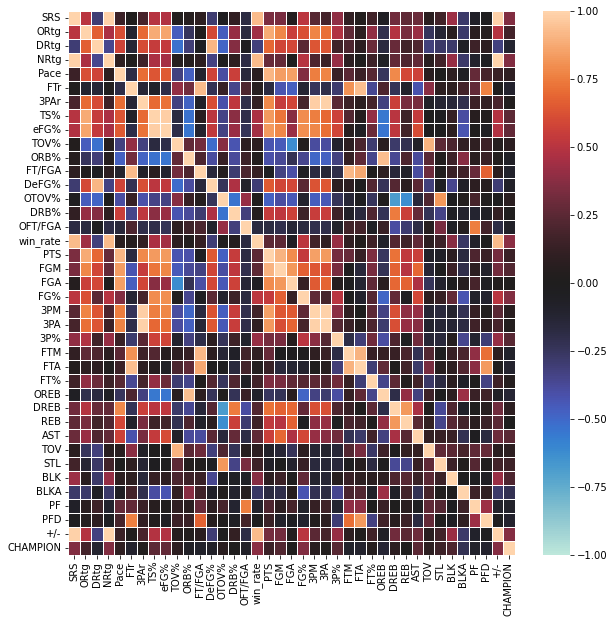

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.heatmap(clean_data.corr() ,center = 0, vmin = -1, vmax = 1, linewidths=.75)


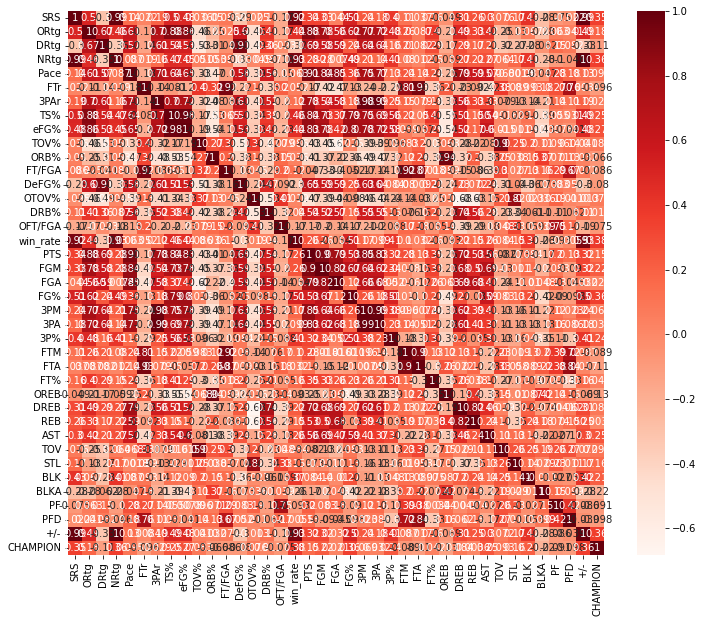

In [20]:
plt.figure(figsize=(12,10))
##cor = clean_data.corr()
sns.heatmap(clean_data.corr(),annot = True, cmap=plt.cm.Reds)
plt.show()

In [21]:
#correlation with output variable
cor_target = abs(clean_data.corr()["win_rate"])

#selecting highly correlated features
relevant_features = cor_target[cor_target>0.4]
relevant_features

SRS         0.924683
ORtg        0.437194
NRtg        0.926309
TS%         0.462311
eFG%        0.440080
win_rate    1.000000
FG%         0.510684
3P%         0.406557
+/-         0.925331
Name: win_rate, dtype: float64

For each feature, their correlation with win_rate is above.

In [22]:

selected_data = pd.DataFrame(data=clean_data,columns=['SRS','ORtg','NRtg','TS%','eFG%','win_rate','FG%','3P%','+/-'])

In [23]:
selected_data.head()


,SRS,ORtg,NRtg,TS%,eFG%,win_rate,FG%,3P%,+/-
0,5.67,117.2,5.9,0.597,0.564,0.708333,49.0,37.8,5.8
1,1.07,112.0,1.0,0.560,0.528,0.527778,46.7,35.6,1.0
2,-0.06,111.2,0.0,0.581,0.546,0.555556,46.8,35.8,0.0
3,5.57,117.2,5.8,0.593,0.566,0.638889,48.7,38.9,5.9
4,5.28,113.2,5.6,0.579,0.541,0.680556,47.6,37.4,5.6


In [24]:
y = selected_data["win_rate"]
X = selected_data.drop("win_rate",1)

C:\Users\MATTHI~2\AppData\Local\Temp/ipykernel_744/3307083384.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = selected_data.drop("win_rate",1)


# we will now explore feature selection with various methods, the first method will be the Wrapper method (Backward Elimination) and the second, the embedded method

#  Embedded method

Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.
Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

In [25]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.002116
Best score using built-in LassoCV: 0.865074


In [26]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 5 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

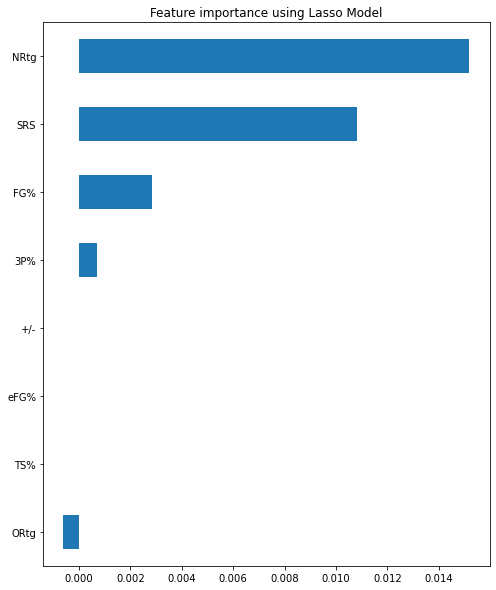

In [27]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

from prev analysis : Index(['SRS', 'NRtg', 'TS%', 'eFG%', 'FG%'], dtype='object')
from this one : NRtg , SRS, FG%, 3P%, ORtg

TS% and eFG% VS Ortg and 3P%
0.462311, 0.44008,  0.437194, 0.406557

these are their correlation with win_rate, and since TS% and eFG% have higher correlation, we will use these?

so the final variables are SRS , NRtg, FG%, TS% , eFG%

# Selected features from this model are NRtg, SRS, FG%, 3P% and ORtg.

 ## Now we move on to our second method, backward elimination

Backward elimination is a wrapper method which needs one machine learning algorithm and uses its performance as evaluation criteria. This means, you feed the features to the selected Machine Learning algorithm and based on the model performance you add or remove the features. This is an iterative and computationally expensive process.

In our method, we will be using the Ordinary Least Squares model, which is used for performing linear regression.
The performance metric used here to evaluate feature performance is p-value. If the p-value is above a threshold, we will remove it. 

We will first run one iteration here just to get an idea of the concept and then we will run the same code in a loop, which will give the final set of features.


In [28]:
#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X)
#Fitting sm.OLS model
model = sm.OLS(y,X_1).fit()
model.pvalues

C:\Users\Matthias Lye\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const    0.011175
SRS      0.080225
ORtg     0.315553
NRtg     0.513782
TS%      0.066693
eFG%     0.056729
FG%      0.095828
3P%      0.273750
+/-      0.883980
dtype: float64

In [29]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.13):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['SRS', 'NRtg', 'TS%', 'eFG%', 'FG%']


C:\Users\Matthias Lye\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Matthias Lye\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Matthias Lye\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Matthias Lye\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### The selected variables are the Simple Rating system, Net rating, True shooting %, Effective field goal%, field goal %

from embedded method we selected 'SRS', 'NRtg', 'TS%', 'eFG%', 'FG%'
from backward elimination  : NRtg , SRS, FG%, 3P%, ORtg

We see that SRS, NRtg and FG% are common, but the other 2 are different.

TS% and eFG% VS Ortg and 3P%
0.462311, 0.44008,  0.437194, 0.406557

These are their correlations with win_rate, and since TS% and eFG% have higher correlation, we will use these.

# so the final variables are SRS , NRtg, FG%, TS% , eFG%

## we will now see the EDA of the chosen variables 

In [30]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

testData = pd.DataFrame(selected_data[["SRS", "NRtg", "FG%", "TS%","eFG%"]])
testData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SRS     160 non-null    float64
 1   NRtg    160 non-null    float64
 2   FG%     160 non-null    float64
 3   TS%     160 non-null    float64
 4   eFG%    160 non-null    float64
dtypes: float64(5)
memory usage: 7.5 KB


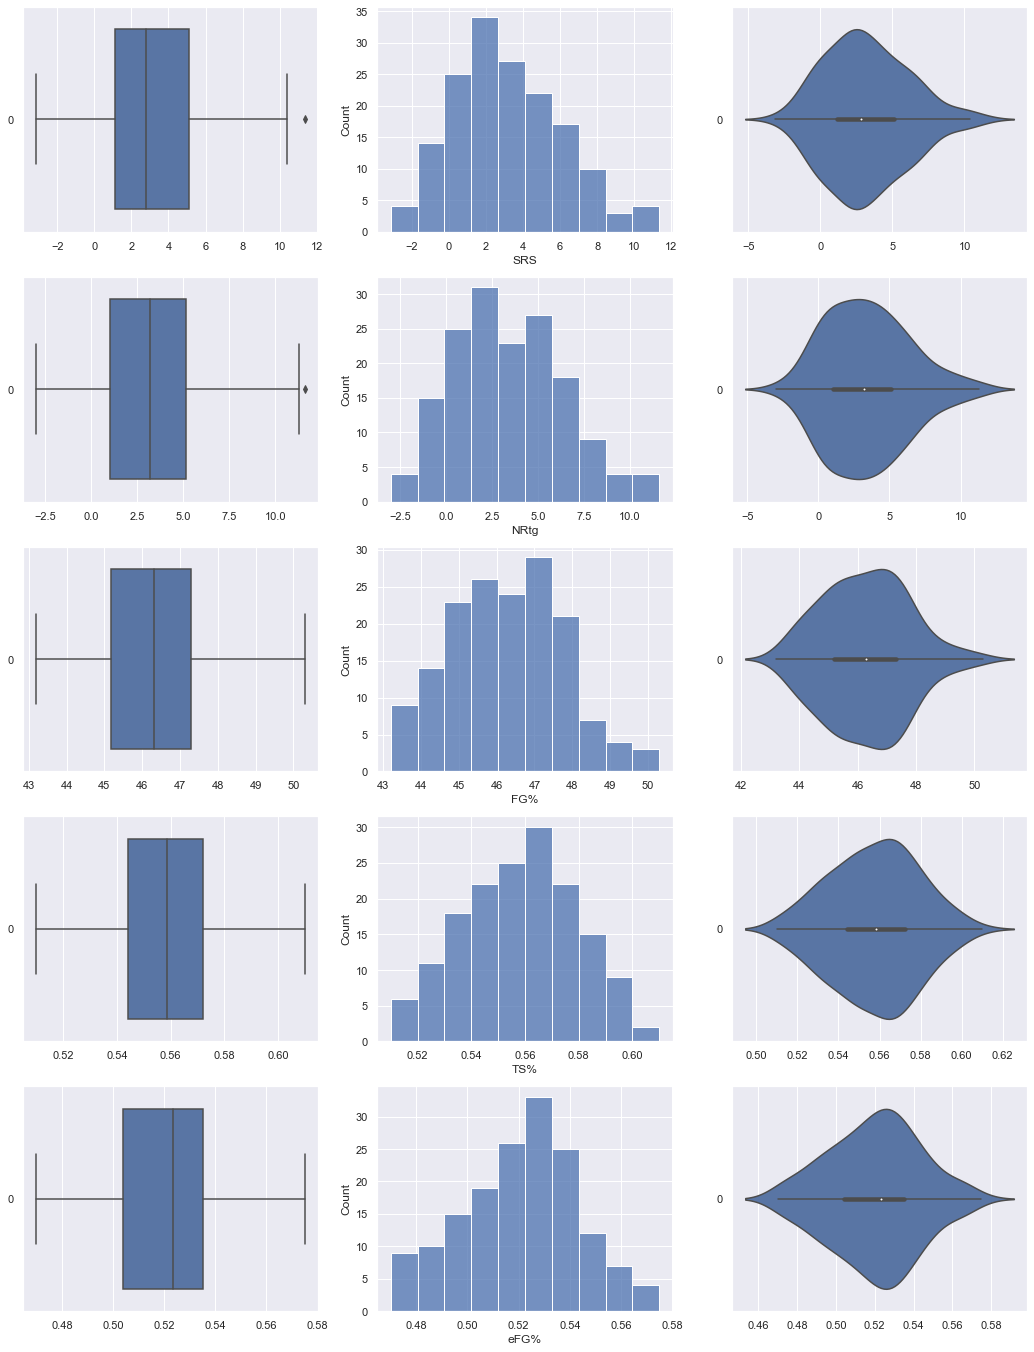

In [31]:
f, axes = plt.subplots(5, 3, figsize=(18, 24))

count = 0
for var in testData:
    sb.boxplot(data = testData[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = testData[var], ax = axes[count,1])
    sb.violinplot(data = testData[var], orient = "h", ax = axes[count,2])
    count += 1    

In [32]:
Q1 = testData.quantile(0.25)
Q3 = testData.quantile(0.75)
IQR = Q3 - Q1

((testData < (Q1 - 1.5 * IQR)) | (testData > (Q3 + 1.5 * IQR))).sum()

SRS     1
NRtg    1
FG%     0
TS%     0
eFG%    0
dtype: int64

## It can be seen that the variables followed somewhat of a normal distribution 

With this, we are able to see the outliners which concludes which SRS and NRtg

# Oversampling using smote

In [33]:

# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [34]:
clean_data.head()

,SRS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,eFG%,TOV%,...,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-,CHAMPION
0,5.67,117.2,111.3,5.9,97.2,0.212,0.392,0.597,0.564,11.5,...,42.9,26.9,12.5,7.2,4.3,3.6,19.1,18.0,5.8,False
1,1.07,112.0,111.0,1.0,100.4,0.232,0.342,0.560,0.528,11.6,...,46.5,26.9,13.3,9.1,5.1,5.2,18.7,18.3,1.0,False
2,-0.06,111.2,111.2,0.0,96.6,0.252,0.432,0.581,0.546,13.1,...,41.5,26.3,14.1,7.9,4.0,4.0,18.9,19.6,0.0,False
3,5.57,117.2,111.4,5.8,102.2,0.233,0.404,0.593,0.566,12.0,...,48.1,25.5,13.8,8.1,4.6,4.8,17.3,18.3,5.9,True
4,5.28,113.2,107.6,5.6,99.5,0.293,0.347,0.579,0.541,12.8,...,45.1,23.7,14.4,9.1,6.2,4.7,20.2,21.0,5.6,False


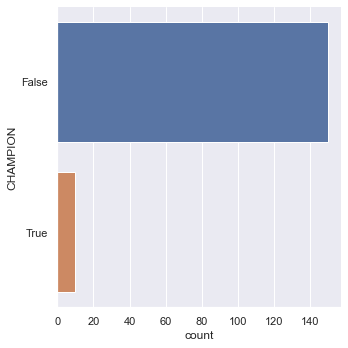

In [35]:
champ = pd.DataFrame(clean_data['CHAMPION'])
sb.catplot(y = "CHAMPION", data = champ, kind = "count")

# 10 CHAMPIONS TO 150 NON CHAMNPIONS, THEREFORE CLASS IMBALANCE, NEED TO OVERSAMPLE THE CHAMPIONS

In [36]:

!pip install imblearn 
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(clean_data[['NRtg','SRS','eFG%','FG%','TS%']], clean_data['CHAMPION'])
df_oversampler = pd.DataFrame(X, columns = ['NRtg','SRS','eFG%','FG%','TS%'])


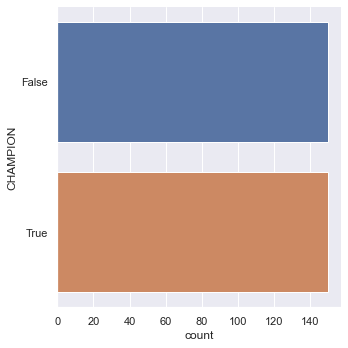

In [37]:
champ2=pd.DataFrame(y)
champ2.head()
sb.catplot(y = "CHAMPION", data = champ2, kind = "count")

# after oversampling

In [38]:

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state = 42)
print('Shape of Training df: ', X_train.shape)
print('Shape of Validation df: ', X_test.shape)
print('Shape of Test df: ', y_train.shape)
print('Shape of Training df: ', y_test.shape)


Shape of Training df:  (240, 5)
Shape of Validation df:  (60, 5)
Shape of Test df:  (240,)
Shape of Training df:  (60,)


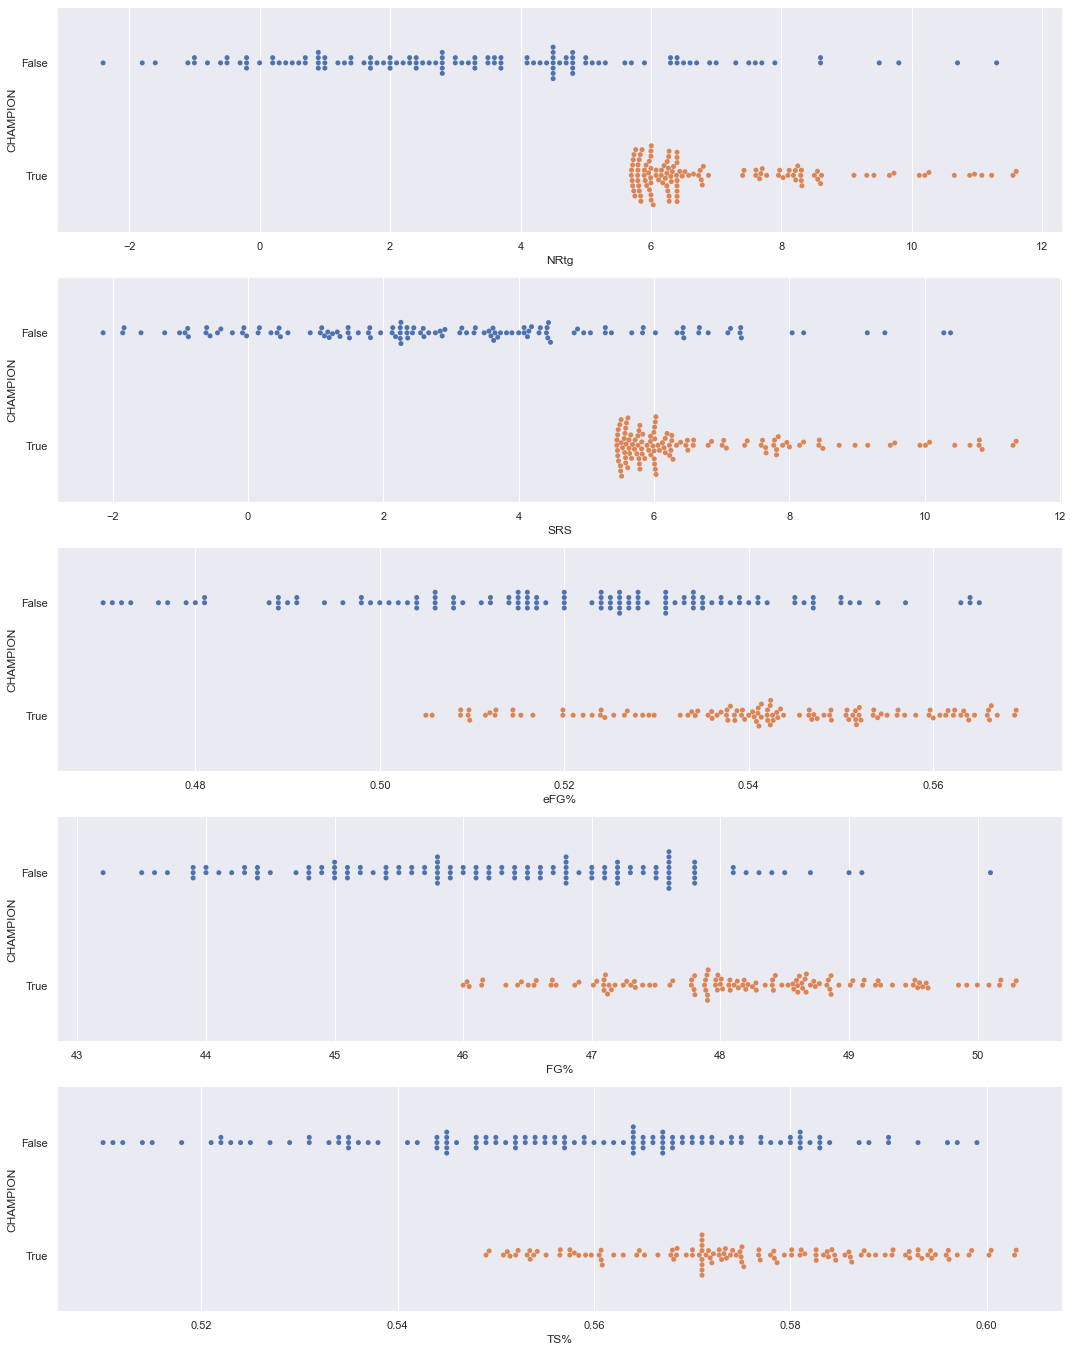

In [39]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train], axis = 1).reindex(y_train.index)

f, axes = plt.subplots(5, 1, figsize=(18, 24))

count = 0
for var in X_train:
    sb.swarmplot(x = var, y = "CHAMPION", data = trainDF, orient = "h", ax = axes[count])
    count += 1

<AxesSubplot:xlabel='TS%', ylabel='CHAMPION'>

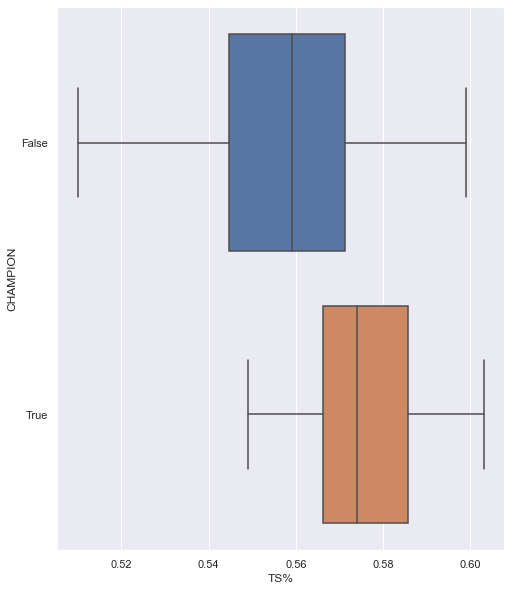

In [40]:
sb.boxplot(x = "TS%", y = "CHAMPION", data = trainDF, orient = "h")





<AxesSubplot:xlabel='NRtg', ylabel='CHAMPION'>

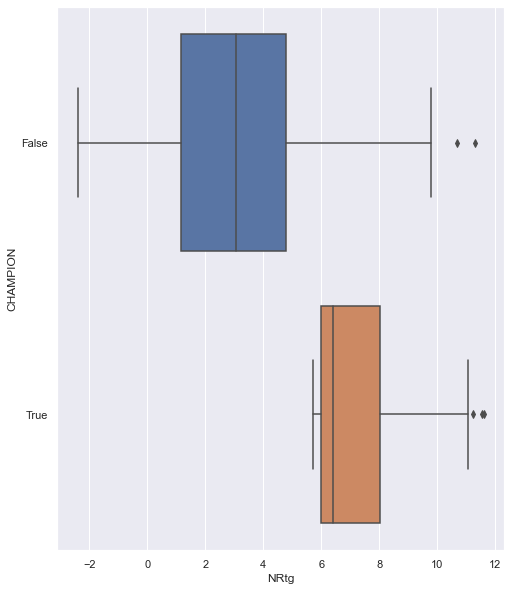

In [41]:
sb.boxplot(x = "NRtg", y = "CHAMPION", data = trainDF, orient = "h")

<AxesSubplot:xlabel='SRS', ylabel='CHAMPION'>

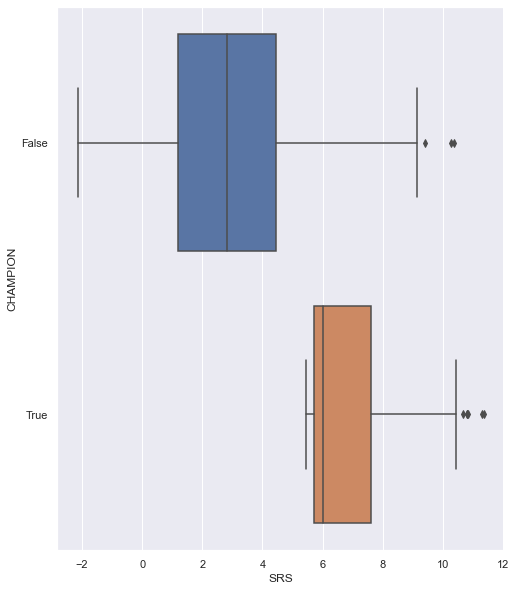

In [42]:
sb.boxplot(x = "SRS", y = "CHAMPION", data = trainDF, orient = "h")

<AxesSubplot:xlabel='FG%', ylabel='CHAMPION'>

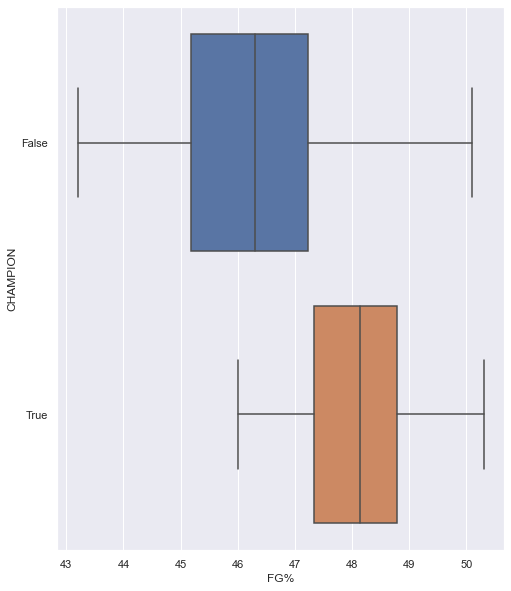

In [43]:
sb.boxplot(x = "FG%", y = "CHAMPION", data = trainDF, orient = "h")

<AxesSubplot:xlabel='eFG%', ylabel='CHAMPION'>

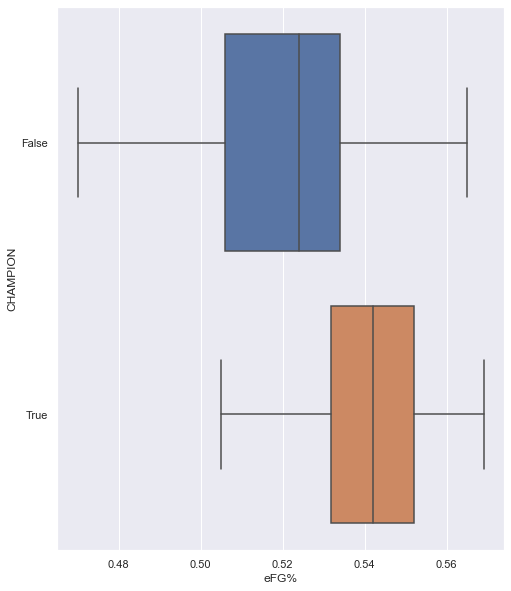

In [44]:

sb.boxplot(x = "eFG%", y = "CHAMPION", data = trainDF, orient = "h")

# As we can see, the distribution between the champions and the non-champions is noticeable 

# Part 3: MACHINE LEARNING

# Using a default decision tree

In [45]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 1.0

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9666666666666667



<AxesSubplot:>

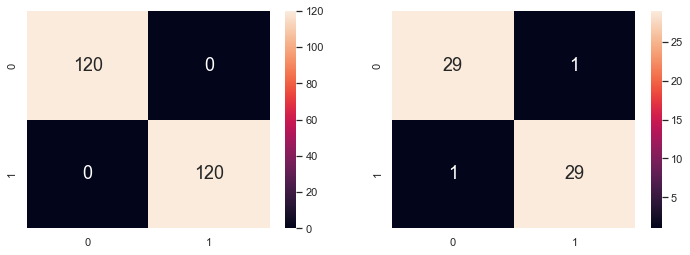

In [46]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier()  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [47]:
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

cmTrain = confusion_matrix(y_test, y_test_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Test :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Test :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Test :\t", (fnTrain/(tpTrain + fnTrain)))

TPR Train :	 1.0
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.0
TPR Test :	 0.9310344827586207
TNR Test :	 0.9354838709677419

FPR Test :	 0.06451612903225806
FNR Test :	 0.06896551724137931


## Two reasons why this Decision Tree is impractical 

## 1) when there is an accuracy of 1 ,it means it is replica of ground which is nor practically possible.

## 2) From here we can see the result of confusion matrix where False positive rate and false negative rate is both zero.

## In a way, One can achieve a zero false positive rate, but it might come at the cost of a low true negative rate (or high false negative rate). But this does not seem to be the case as TNR and FNR for train is skewed.

[Text(0.358695652173913, 0.9285714285714286, 'SRS <= 5.41\ngini = 0.5\nsamples = 240\nvalue = [119, 121]\nclass = Champion'),
 Text(0.31521739130434784, 0.7857142857142857, 'gini = 0.0\nsamples = 98\nvalue = [98, 0]\nclass = Loser'),
 Text(0.40217391304347827, 0.7857142857142857, 'SRS <= 6.336\ngini = 0.252\nsamples = 142\nvalue = [21, 121]\nclass = Champion'),
 Text(0.13043478260869565, 0.6428571428571429, 'FG% <= 45.9\ngini = 0.095\nsamples = 80\nvalue = [4, 76]\nclass = Champion'),
 Text(0.08695652173913043, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Loser'),
 Text(0.17391304347826086, 0.5, 'NRtg <= 5.701\ngini = 0.073\nsamples = 79\nvalue = [3, 76]\nclass = Champion'),
 Text(0.08695652173913043, 0.35714285714285715, 'FG% <= 47.1\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Loser'),
 Text(0.043478260869565216, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Loser'),
 Text(0.13043478260869565, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalu

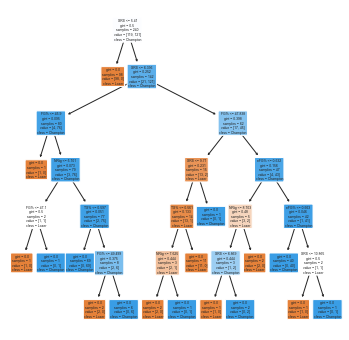

In [48]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(6,6))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Loser","Champion"])

## Hyper parameter tuning using GridSearch

In [49]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)
print(clf.tree_.max_depth)

6


By setting a random_state, we can guarantee the same solution everytime our programm is run.Passing a specific seed to random_state ensures the same result is generated each time we build the model.

With a clear vision on how deep the maximum depth of a tree, we can work on it as it allows for one to set the boundary how the tree is expanded.

In [50]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [51]:
std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()

In [52]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

In [53]:
n_components = list(range(1,X.shape[1]+1,1))

In [54]:
criterion = ['gini', 'entropy']
max_depth = [1,2,3,4,5,6]
splitter = ["best","random"]
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]
min_weight_fraction_leaf = [0.1,0.2,0.3,0.4,0.5]
max_features = ["auto","log2","sqrt"]
max_leaf_nodes =[None,10,20,30,40,50]


In [55]:
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth,
                 dec_tree__splitter = splitter,
                 dec_tree__min_samples_leaf=min_samples_leaf,
                dec_tree__min_weight_fraction_leaf=min_weight_fraction_leaf,
                 dec_tree__max_features=max_features,
                 dec_tree__max_leaf_nodes=max_leaf_nodes)

In [56]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [1, 2, 3, 4, 5, 6],
                         'dec_tree__max_features': ['auto', 'log2', 'sqrt'],
                         'dec_tree__max_leaf_nodes': [None, 10, 20, 30, 40, 50],
                         'dec_tree__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10],
                         'dec_tree__min_weight_fraction_leaf': [0.1, 0.2, 0.3,
                                                                0.4, 0.5],
                         'dec_tree__splitter': ['best', 'random'],
                         'pca__n_components': [1, 2, 3, 4, 5]})

In [57]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print('Splitter:', clf_GS.best_estimator_.get_params()['dec_tree__splitter'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 4
Best Number Of Components: 4
Splitter: best

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='log2',
                       max_leaf_nodes=20, min_samples_leaf=5,
                       min_weight_fraction_leaf=0.1)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9291666666666667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.95



<AxesSubplot:>

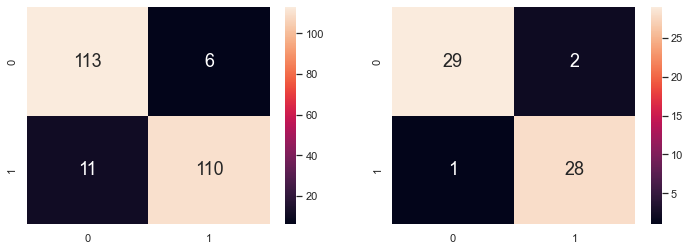

In [58]:
# Decision Tree using Train Data
dectree =DecisionTreeClassifier(random_state=42,criterion='entropy', max_depth=4,max_features='log2',max_leaf_nodes=20,min_samples_leaf=5,min_weight_fraction_leaf=0.1,splitter='best')
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [59]:
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

cmTrain = confusion_matrix(y_test, y_test_pred)
tpTrain = cmTrain[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain = cmTrain[0][1] # False Positives : N (0) predicted Y (1)
tnTrain = cmTrain[0][0] # True Negatives : N (0) predicted N (0)
fnTrain = cmTrain[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Test :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Test :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Test :\t", (fnTrain/(tpTrain + fnTrain)))

TPR Train :	 0.9090909090909091
TNR Train :	 0.9495798319327731

FPR Train :	 0.05042016806722689
FNR Train :	 0.09090909090909091
TPR Test :	 0.9655172413793104
TNR Test :	 0.9354838709677419

FPR Test :	 0.06451612903225806
FNR Test :	 0.034482758620689655


## When using the hyperparameters in this cases, we can see a better point of view in this scenario where the numbers aren't too skewed. It can give you optimized values for hyperparameters, which maximizes your model's predictive accuracy as we can see here when we are comparing it to the previous decision tree.

[Text(0.375, 0.875, 'SRS <= 5.41\nentropy = 1.0\nsamples = 240\nvalue = [119, 121]\nclass = Champion'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 98\nvalue = [98, 0]\nclass = Loser'),
 Text(0.5, 0.625, 'SRS <= 6.336\nentropy = 0.605\nsamples = 142\nvalue = [21, 121]\nclass = Champion'),
 Text(0.25, 0.375, 'TS% <= 0.574\nentropy = 0.286\nsamples = 80\nvalue = [4, 76]\nclass = Champion'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38]\nclass = Champion'),
 Text(0.375, 0.125, 'entropy = 0.454\nsamples = 42\nvalue = [4, 38]\nclass = Champion'),
 Text(0.75, 0.375, 'FG% <= 48.103\nentropy = 0.847\nsamples = 62\nvalue = [17, 45]\nclass = Champion'),
 Text(0.625, 0.125, 'entropy = 0.983\nsamples = 26\nvalue = [15, 11]\nclass = Loser'),
 Text(0.875, 0.125, 'entropy = 0.31\nsamples = 36\nvalue = [2, 34]\nclass = Champion')]

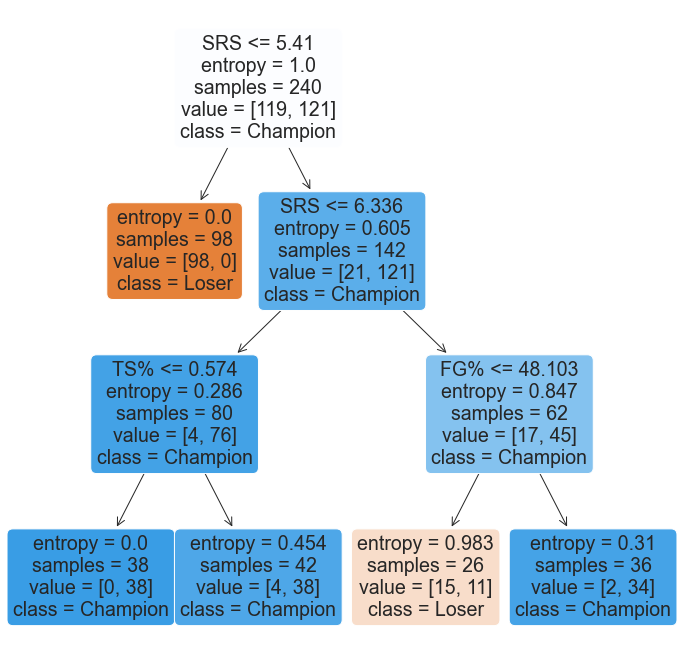

In [60]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Loser","Champion"])

# Logistic regression

In [47]:
X.head()

,NRtg,SRS,eFG%,FG%,TS%
0,5.9,5.67,0.564,49.0,0.597
1,1.0,1.07,0.528,46.7,0.560
2,0.0,-0.06,0.546,46.8,0.581
3,5.8,5.57,0.566,48.7,0.593
4,5.6,5.28,0.541,47.6,0.579


Accuracy of logistic regression classifier on train set: 0.90
[[103  20]
 [  5 112]]
TPR Train :	 0.9572649572649573
TNR Train :	 0.8373983739837398

FPR Train :	 0.16260162601626016
FNR Train :	 0.042735042735042736


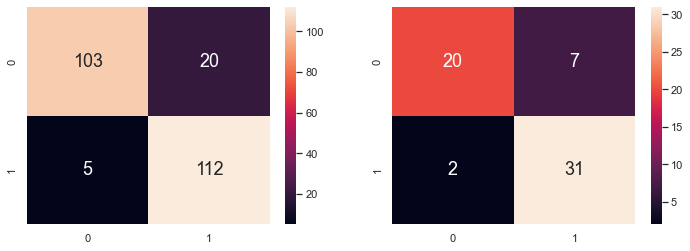

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_train_pred=logreg.predict(X_train)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

confusion_matrix = confusion_matrix(y_train, y_train_pred)
print(confusion_matrix)
tpTrain = confusion_matrix[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain =  confusion_matrix[0][1] # False Positives : N (0) predicted Y (1)
tnTrain =  confusion_matrix[0][0] # True Negatives : N (0) predicted N (0)
fnTrain =  confusion_matrix[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))


In [77]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [79]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
tpTrain =  confusion_matrix[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain =  confusion_matrix[0][1] # False Positives : N (0) predicted Y (1)
tnTrain =  confusion_matrix[0][0] # True Negatives : N (0) predicted N (0)
fnTrain =  confusion_matrix[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Test :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Test :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Test :\t", (fnTrain/(tpTrain + fnTrain)))



[[20  7]
 [ 2 31]]
TPR Test :	 0.9393939393939394
TNR Test :	 0.7407407407407407

FPR Test :	 0.25925925925925924
FNR Test :	 0.06060606060606061


<AxesSubplot:xlabel='TS%', ylabel='CHAMPION'>

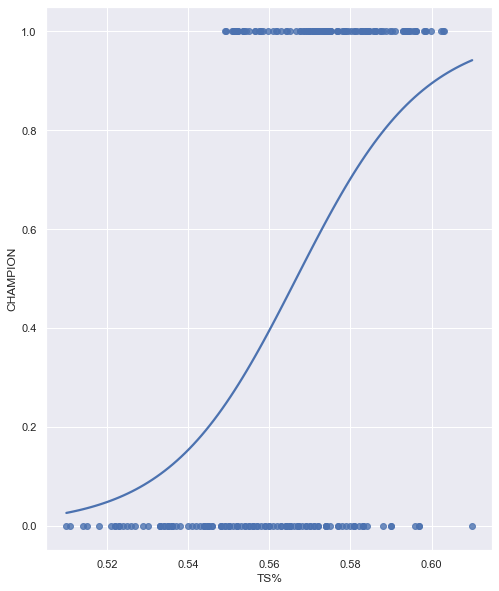

In [80]:
sb.regplot(x=X_train['TS%'], y=y_train, data=clean_data, logistic=True, ci=None)


<AxesSubplot:xlabel='eFG%', ylabel='CHAMPION'>

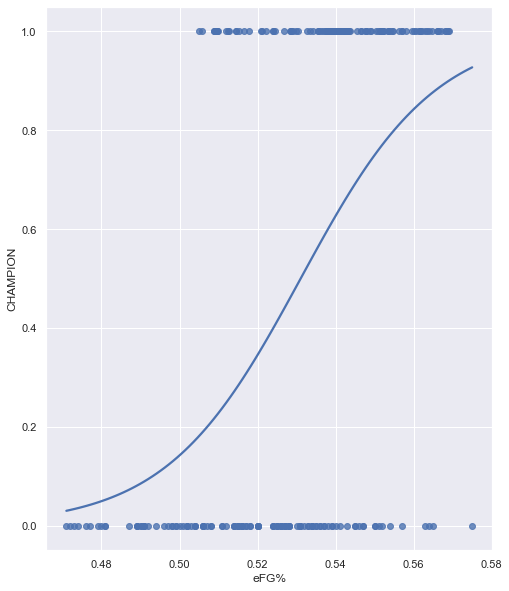

In [81]:
sb.regplot(x=X_train['eFG%'], y=y_train, data=clean_data, logistic=True, ci=None)

<AxesSubplot:xlabel='FG%', ylabel='CHAMPION'>

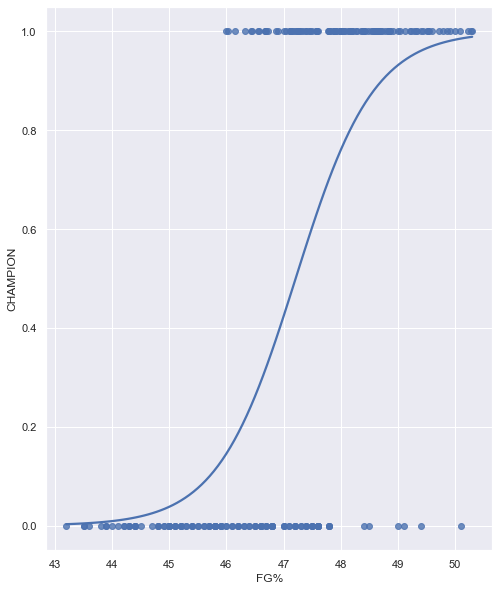

In [82]:
sb.regplot(x=X_train['FG%'], y=y_train, data=clean_data, logistic=True, ci=None)

<AxesSubplot:xlabel='SRS', ylabel='CHAMPION'>

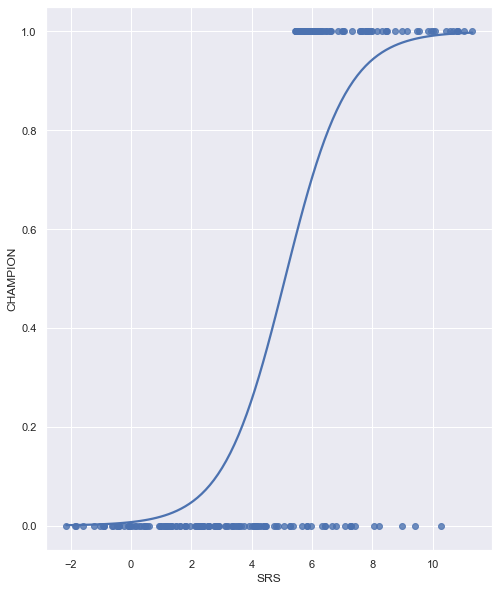

In [83]:
sb.regplot(x=X_train['SRS'], y=y_train, data=clean_data, logistic=True, ci=None)

<AxesSubplot:xlabel='NRtg', ylabel='CHAMPION'>

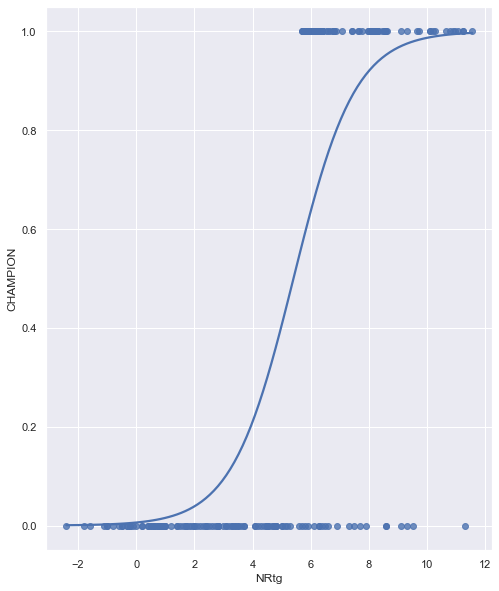

In [84]:
sb.regplot(x=X_train['NRtg'], y=y_train, data=clean_data, logistic=True, ci=None)

# These plots show that a high NRTG,SRS,FG%,eFG%,TS% are all needed for the champion

## with logistic regression, it can see that the classification accuracy for train and test is 0.90 and 0.85 respectively with a high true positive rate of 0.96 and 0.94 for train and test respectively and a high true negative rate of 0.84 and 0.74 for train and test respectively

# It can be seen that the base decision tree has a better classification accuracy than the logistic regression for train and a worse classification accuracy for test. However, let's try hyperparameter tuning the logistic regression

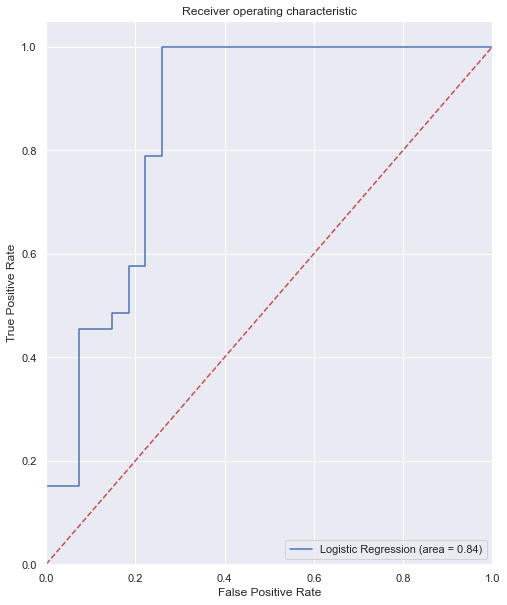

In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## This is the ROC for the standard logistic regression with a high area under curve of 0.84, lets see what happens when we tune the model 

In [86]:

# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.903333 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.878889 (0.045120) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.878889 (0.045120) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.887778 (0.040810) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.877778 (0.045812) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.877778 (0.045812) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.903333 (0.048189) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.877778 (0.046614) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.877778 (0.046614) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.896667 (0.049703) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.874444 (0.046094) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.874444 (0.046094) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.897778 (0.050869) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.895556 (0.042803) with

Best: 0.898611 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'} : THese ARE THE BEST PARAMETERS FOR OUR LOGISTIC REGRESSION

Accuracy of logistic regression classifier on train set: 0.90
[[101  24]
 [  0 115]]
TPR Train :	 1.0
TNR Train :	 0.808

FPR Train :	 0.192
FNR Train :	 0.0


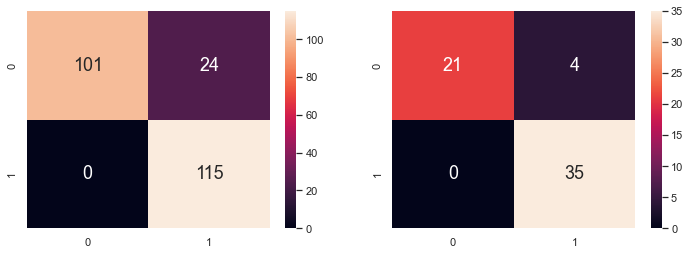

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
logreg = LogisticRegression(C= 10, penalty= 'l2', solver= 'liblinear' )
logreg.fit(X_train, y_train)
y_train_pred=logreg.predict(X_train)
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))


confusion_matrix = confusion_matrix(y_train, y_train_pred)
print(confusion_matrix)
tpTrain = confusion_matrix[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain =  confusion_matrix[0][1] # False Positives : N (0) predicted Y (1)
tnTrain =  confusion_matrix[0][0] # True Negatives : N (0) predicted N (0)
fnTrain =  confusion_matrix[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))


In [88]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
tpTrain =  confusion_matrix[1][1] # True Positives : Y (1) predicted Y (1)
fpTrain =  confusion_matrix[0][1] # False Positives : N (0) predicted Y (1)
tnTrain =  confusion_matrix[0][0] # True Negatives : N (0) predicted N (0)
fnTrain =  confusion_matrix[1][0] # False Negatives : Y (1) predicted N (0)

print("TPR Test :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Test :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Test :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Test :\t", (fnTrain/(tpTrain + fnTrain)))



Accuracy of logistic regression classifier on test set: 0.93
[[21  4]
 [ 0 35]]
TPR Test :	 1.0
TNR Test :	 0.84

FPR Test :	 0.16
FNR Test :	 0.0


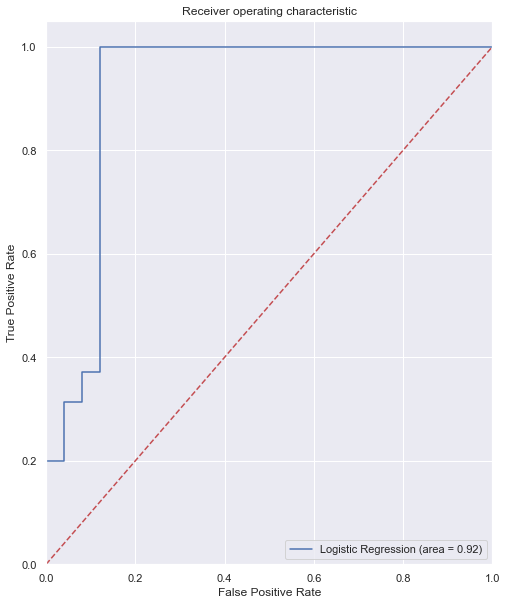

In [90]:
# from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# From the ROC, the area under curve  for the test set actually improves to 0.92, with the classification accuracy of the train data set stays the same from 0.90 to 0.90, while the classification accuracy of the test data set improves from 0.85 to 0.93, showing the successful hyperparameter tuning